In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import tabulate

#from sklearn import datasets
#from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.pipeline import make_pipeline

#для расчета ROC-кривой
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

from sklearn.metrics import accuracy_score #доля правильных ответов в классификации
from sklearn.metrics import mean_squared_error

**Загрузим датасет и проверим на наличие нулевых значений.**

In [462]:
data=pd.read_csv('C:/Users/Лина/Downloads/Обучение/Машинное обучение/Проблема качества данных/ДЗ/train.csv', delimiter=',')
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [463]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Удалим все пропущенные значения и категориальные переменные.**

In [464]:
data = data[ pd.isnull( data['Age'] ) == 0 ]
data = data[ pd.isnull( data['Cabin'] ) == 0 ]
data = data[ pd.isnull( data['Embarked'] ) == 0 ]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


**Построим модель линейной регресии и проведем обучение.**

In [465]:
X = pd.get_dummies( data, columns = [ 'Name' ] )
X = pd.get_dummies( X, columns = [ 'Sex' ] )
X = pd.get_dummies( X, columns = [ 'Ticket' ] )
X = pd.get_dummies( X, columns = [ 'Cabin' ] )
X = pd.get_dummies( X, columns = [ 'Embarked' ] )

X['Age'] = X['Age'].astype('int')
X['Fare'] = X['Fare'].astype('int')

X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Columns: 455 entries, PassengerId to Embarked_S
dtypes: int32(2), int64(5), uint8(448)
memory usage: 90.1 KB


In [466]:
y = selectedColumns[['Survived']].values.ravel()

In [467]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X_train) + len(X_test) == len(X)

model = make_pipeline(
StandardScaler(),
LogisticRegression(max_iter=1000))

#обучаем модель
model.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions[:100]
model.predict_proba(X_test)

array([[0.23351097, 0.76648903],
       [0.85394436, 0.14605564],
       [0.00358565, 0.99641435],
       [0.51420467, 0.48579533],
       [0.12872459, 0.87127541],
       [0.64746394, 0.35253606],
       [0.80477272, 0.19522728],
       [0.00811581, 0.99188419],
       [0.23293733, 0.76706267],
       [0.69297268, 0.30702732],
       [0.58376658, 0.41623342],
       [0.01249063, 0.98750937],
       [0.67082439, 0.32917561],
       [0.01186209, 0.98813791],
       [0.41175464, 0.58824536],
       [0.07643518, 0.92356482],
       [0.00189028, 0.99810972],
       [0.08940153, 0.91059847],
       [0.15478103, 0.84521897],
       [0.19116712, 0.80883288],
       [0.01186623, 0.98813377],
       [0.00548782, 0.99451218],
       [0.05240191, 0.94759809],
       [0.09369727, 0.90630273],
       [0.63968298, 0.36031702],
       [0.01463149, 0.98536851],
       [0.0209142 , 0.9790858 ],
       [0.68494222, 0.31505778],
       [0.01155564, 0.98844436],
       [0.01413639, 0.98586361],
       [0.

**Посчитаем метрику качества MSE.**

In [491]:
mse_1 = mean_squared_error(y_test, predictions)
print(f"MSE: {mse_1}")

MSE: 0.21935483870967742


**Загрузим данные повторно.**

In [469]:
data1=pd.read_csv('C:/Users/Лина/Downloads/Обучение/Машинное обучение/Проблема качества данных/ДЗ/train.csv', delimiter=',')
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Удалим признаки 'PassengerId', 'Name' и 'Ticket', которые логически не нужны для построения модели, так как являются уникальными идентификаторами и не могут использоваться в качестве признаков для обучения.**

In [470]:
data1 = data1 [['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked' ]]

**Посмотрим в каких полях содержаться нулевые значения.**

In [471]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


**Посчитаем, какой процент данных будет потерян, если просто удалить пропуски.**

In [472]:
selectedColumns1 = data1
selectedColumns1 = selectedColumns1[ pd.isnull( selectedColumns1['Age'] ) == 0 ]
selectedColumns1 = selectedColumns1[ pd.isnull( selectedColumns1['Cabin'] ) == 0 ]
selectedColumns1 = selectedColumns1[ pd.isnull( selectedColumns1['Embarked'] ) == 0 ]

selectedColumns1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Sex       183 non-null    object 
 3   Age       183 non-null    float64
 4   SibSp     183 non-null    int64  
 5   Parch     183 non-null    int64  
 6   Fare      183 non-null    float64
 7   Cabin     183 non-null    object 
 8   Embarked  183 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 14.3+ KB


In [473]:
percent_lost = len(selectedColumns1) / len(data1) *  100
print(f'Процент данных, утерянный после простого удаления пропусков: {percent_lost:.2f}%')

Процент данных, утерянный после простого удаления пропусков: 20.54%


**Посмотрим какой набор значений в категориальных полях, содержащих пропуски.**

In [474]:
data1['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [475]:
data1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**Заполним пропуски в поле 'Age' средним значением.**

In [476]:
data1['Age'] = data1['Age'].fillna(data1['Age'].mean()).fillna(method='bfill')

**Заполним пропуски в поле 'Cabin' значением 'A000'.**

In [477]:
data1['Cabin'] = data1['Cabin'].fillna(value='A000')

**Заполним пропуски в поле 'Embarked' значением 'W'.**

In [478]:
data1['Embarked'] = data1['Embarked'].fillna(value='W')

In [479]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


**Построим графики для анализа данных выборки.**

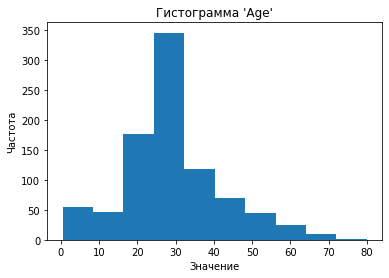

In [480]:
plt.hist(data1['Age'])

plt.xlabel("Значение")
plt.ylabel("Частота")

plt.title("Гистограмма 'Age'")

plt.show()

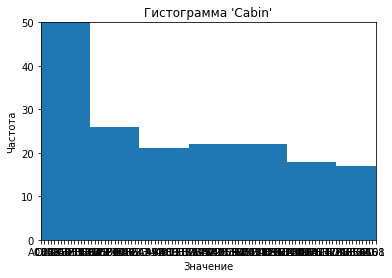

In [481]:
plt.hist(data1['Cabin'])

plt.xlabel("Значение")
plt.ylabel("Частота")

plt.title("Гистограмма 'Cabin'")
# Увеличиваем масштаб по обеим осям
plt.xlim([0, 100])  # Устанавливаем новые границы по оси X
plt.ylim([0, 50])   # Устанавливаем новые границы по оси Y


plt.show()

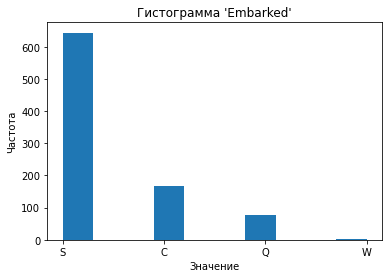

In [482]:
plt.hist(data1['Embarked'])

plt.xlabel("Значение")
plt.ylabel("Частота")

plt.title("Гистограмма 'Embarked'")

plt.show()

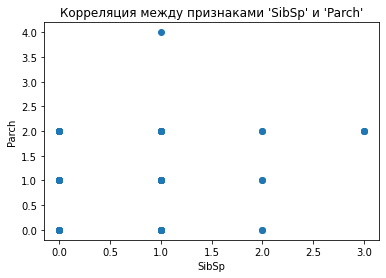

<Figure size 864x720 with 0 Axes>

In [483]:
import matplotlib.pyplot as plt

x_values = data['SibSp']
y_values = data['Parch']

plt.scatter(x_values, y_values)

plt.xlabel('SibSp')
plt.ylabel('Parch')
plt.title("Корреляция между признаками 'SibSp' и 'Parch'")
plt.figure(figsize=(12, 10))

plt.show()

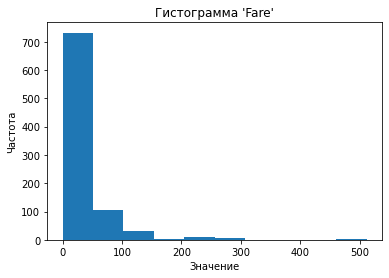

In [484]:
plt.hist(data1['Fare'])

plt.xlabel("Значение")
plt.ylabel("Частота")

plt.title("Гистограмма 'Fare'")

plt.show()

**Проверим на наличие выбросов поле 'Fare' и исключим записис с выбросами при их наличии.**

In [485]:
# Определение квантилей
q1, q3 = data1['Fare'].quantile([0.25, 0.75])
iqr = q3 - q1

# Определение верхнего и нижнего выброса
upper_outlier = q3 + 1.5  *  iqr
lower_outlier = q1 - 1.5  *  iqr

# Проверка наличия выбросов
has_upper_outliers = data1['Fare'].max() > upper_outlier
has_lower_outliers = data1['Fare'].min() < lower_outlier

# Вывод результатов
print("Наличие верхних выбросов:", has_upper_outliers)
print("Наличие нижних выбросов:", has_lower_outliers)


Наличие верхних выбросов: True
Наличие нижних выбросов: False


In [486]:
data1 = data1[(data1['Fare'] <= upper_outlier)]

In [487]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  775 non-null    int64  
 1   Pclass    775 non-null    int64  
 2   Sex       775 non-null    object 
 3   Age       775 non-null    float64
 4   SibSp     775 non-null    int64  
 5   Parch     775 non-null    int64  
 6   Fare      775 non-null    float64
 7   Cabin     775 non-null    object 
 8   Embarked  775 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 60.5+ KB


**Переведем категориальные значения в цифровые.**

In [488]:
X = data1
X = X[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked' ]]

X = pd.get_dummies( X, columns = [ 'Sex' ] )
X = pd.get_dummies( X, columns = [ 'Cabin' ] )
X = pd.get_dummies( X, columns = [ 'Embarked' ] )

X[['Age']] = X[['Age']].astype(int)
X[['Fare']] = X[['Fare']].astype(int)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 890
Data columns (total 98 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Pclass             775 non-null    int64
 1   Age                775 non-null    int32
 2   SibSp              775 non-null    int64
 3   Parch              775 non-null    int64
 4   Fare               775 non-null    int32
 5   Sex_female         775 non-null    uint8
 6   Sex_male           775 non-null    uint8
 7   Cabin_A000         775 non-null    uint8
 8   Cabin_A10          775 non-null    uint8
 9   Cabin_A14          775 non-null    uint8
 10  Cabin_A16          775 non-null    uint8
 11  Cabin_A19          775 non-null    uint8
 12  Cabin_A20          775 non-null    uint8
 13  Cabin_A23          775 non-null    uint8
 14  Cabin_A24          775 non-null    uint8
 15  Cabin_A26          775 non-null    uint8
 16  Cabin_A31          775 non-null    uint8
 17  Cabin_A32       

**Обучим модель на подготовленном датасете.**

In [489]:
y = data1[['Survived']].values.ravel()

In [490]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
len(X_train) + len(X_test) == len(X)

model = make_pipeline(
StandardScaler(),
LogisticRegression(max_iter=1000))

#обучаем модель
model.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions[:100]
model.predict_proba(X_test)

array([[0.86656597, 0.13343403],
       [0.28744926, 0.71255074],
       [0.89843876, 0.10156124],
       [0.99285661, 0.00714339],
       [0.37967127, 0.62032873],
       [0.88833814, 0.11166186],
       [0.43384182, 0.56615818],
       [0.34089635, 0.65910365],
       [0.90992414, 0.09007586],
       [0.47995562, 0.52004438],
       [0.57191235, 0.42808765],
       [0.95547158, 0.04452842],
       [0.96695257, 0.03304743],
       [0.00631013, 0.99368987],
       [0.91005236, 0.08994764],
       [0.91397677, 0.08602323],
       [0.79566886, 0.20433114],
       [0.92611263, 0.07388737],
       [0.34089635, 0.65910365],
       [0.65650976, 0.34349024],
       [0.88150157, 0.11849843],
       [0.86815015, 0.13184985],
       [0.65209747, 0.34790253],
       [0.4319173 , 0.5680827 ],
       [0.84182215, 0.15817785],
       [0.35562532, 0.64437468],
       [0.35797568, 0.64202432],
       [0.92113054, 0.07886946],
       [0.26964728, 0.73035272],
       [0.9203326 , 0.0796674 ],
       [0.

**Посчитаем метрику качества MSE.**

In [468]:
mse_1 = mean_squared_error(y_test, predictions)
print(f"MSE: {mse_1}")

MSE: 0.13513513513513514


**Выводы.**

Для обучения модели начальный датасет был преобразован в более валидную форму:
1) пропуски данных были заполнены соответствующими значениями (средним, где это имеет смысл, и константами для категориальных полей)

2) значениям категориальных полей сопоставлены цифровые значения

3) поведение признаков изучено на графиках, исключены выбросы.

Итогом преобразований стало получение лучшего значения критерия качества MSE.
Таким образом можно сделать вывод, что предварительная работа с датасетом для обучения модели является важной неотъемлемой частью для получения хорошего результата.